In [1]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as pt
%matplotlib inline
from scipy.io import loadmat
import decimal
data=loadmat(r'C:\Users\saminens\Desktop\ML\ex7data1')

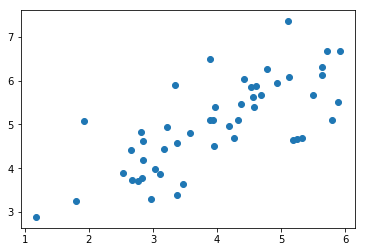

In [2]:
X=data['X']
pt.scatter(X[:,0],X[:,1])
pt.show()

In [3]:
def featurenormalize(X):
    mu=np.mean(X,axis=0)
    sigma=np.std(X,axis=0)
    X_norm=(X-mu)/sigma
    return mu,sigma,X_norm  

In [4]:
def pca(X):
    m,n=X.shape
    sigma=(X.T.dot(X))/m
    U,S,V=np.linalg.svd(sigma)
    return U,S,V

In [5]:
def draw_line(p1,p2,dash=False):
    if dash:
        pt.plot([p1[0], p2[0]], [p1[1], p2[1]], '--',color='k')
    else:
        pt.plot([p1[0], p2[0]], [p1[1], p2[1]], color='k')

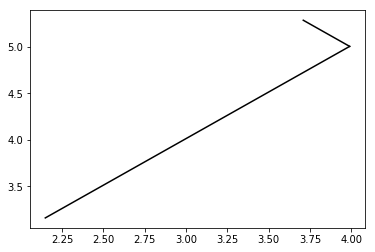

[-0.70710678 -0.70710678]


In [6]:
mu,sigma,X_norm=featurenormalize(X)
U,S,V=pca(X_norm)      #U=eigen vectors, S=eigen values on the diagonal
draw_line(mu,mu+1.5*S[0]*U[:,0].T)
draw_line(mu,mu+1.5*S[1]*U[:,1].T)
pt.show()
print(U[:,0])

In [7]:
#dimension reduction
def projectdata(X,U,K):
    Z=X.dot(U[:,0:K])
    return Z

In [8]:
def recoverdata(Z,U,K):
    X_rec=Z.dot(U[:,0:K].T)
    return X_rec

In [9]:
K = 1
Z = projectdata(X_norm, U, K)
Z[0, ]

array([ 1.49631261])

In [10]:
X_rec=recoverdata(Z,U,K)
X_rec[0,:]

array([-1.05805279, -1.05805279])

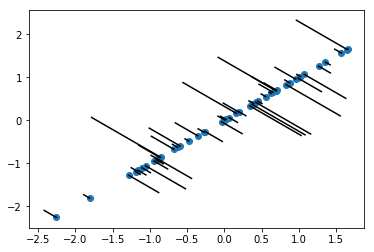

In [11]:
pt.scatter(X_rec[:, 0], X_rec[:, 1])
for i in range(X_norm.shape[0]):
    draw_line(X_norm[i,:],X_rec[i,:]) #end of the lines are where the points actually are, the lines are distances 
pt.show()                             #to the projected points i.e. blue dots

In [12]:
def displaydata(X):
    num_images = len(X)
    rows = int(num_images**.5)
    cols = int(num_images**.5)
    fig, ax = pt.subplots(rows,cols,sharex=True,sharey=True)
    img_num = 0

    for i in range(rows):
        for j in range(cols):
            # Convert column vector into 32x232 pixel matrix and transpose them
            img = X[img_num,:].reshape(32,32).T
            ax[i][j].imshow(img,cmap='gray')
            img_num += 1
    return (fig, ax)

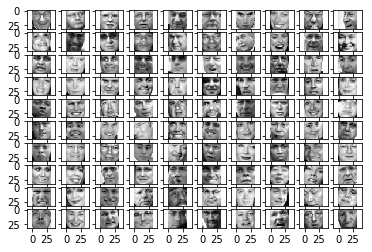

In [13]:
#loading and visualizing face data
mat_data=loadmat(r'C:\Users\saminens\Desktop\ML\ex7faces')
X_1=mat_data['X']
displaydata(X_1[0:100,:])
pt.show()

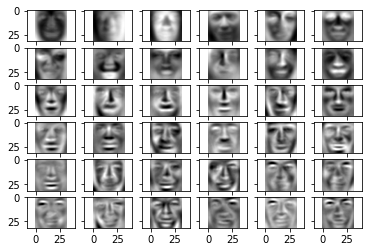

In [14]:
#pca on face data...eigenfaces
mu,sigma,X1_norm = featurenormalize(X_1)
U, S, V = pca(X1_norm)
displaydata(U[:,0:36].T)
pt.show()

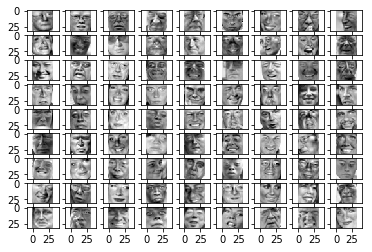

In [15]:
#from 100 principal components
K=100
Z=projectdata(X1_norm,U,K)
X_rec=recoverdata(Z,U,K)
displaydata(X1_norm[1:100,:])
pt.show()

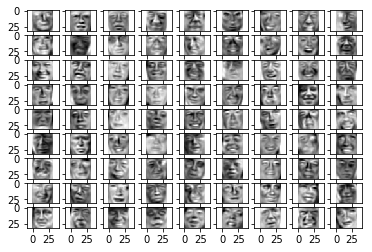

In [16]:
displaydata(X_rec[1:100,:])
pt.show()